In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 4 : Algorithmique</center></span>

## E. Un algorithme de machine learning

### Introduction

Le **machine learning** (apprentissage automatique en français) n'est pas une notion nouvelle. Le terme aurait été utilisé pour la première fois en 1959 par un informaticien américain du nom d'Arthur Samuel. Mais aujourd'hui, sous l'impulsion de l'immense intérêt suscité par la vague de **l'intelligence artificielle**, ce terme est devenu très "à la mode".

Mais comme souvent avec les phénomènes de mode, il faut se méfier un peu car derrière ce terme un peu "magique" se cache des choses qui peuvent être assez simples et pas si "intelligentes" que ça. Nous allons l'illuster avec le cas de **l'algorithme des k plus proches voisins** ou **k-NN** (pour k-Nearest Neighbors en anglais).

### I. Principes du machine learning

#### 1. Comment reconnaître un chat ?

L'idée est de **reproduire informatiquement une des façons dont les humains apprennent**.

Comment un enfant apprend à reconnaître un chat par exemple ? Personne ne commence par lui donner une définition précise de ce qu'est un chat : "C'est un animal à 4 pattes, avec des moustaches et des oreilles pointues, une longue queue, ..." Pourtant, cela pourrait fonctionner. Si la définition est assez précise, on peut alors examiner les critères de la définition un par un, et décider si l'animal qu'on a sous les yeux les remplit tous, ou tout du moins s'il en remplit suffisamment. Auquel cas on dira que c'est bien un chat.



En pratique cela ne fonctionne pas comme ça. La première fois qu'un enfant voit un chat, un adulte lui dit que ça en est un. Puis, la prochaine fois que l'enfant voit quelque chose de ressemblant, un chien, un lion ou pourquoi pas une autruche :), l'enfant croit à nouveau reconnaître un chat. En général, un adulte sera là pour confirmer ou infirmer l'hypothèse. Et c'est ainsi que le **cerveau apprend petit à petit à classer** les chats dans une catégorie et les autruches dans une autre.

Cet apprentissage fonctionne donc par **comparaison** mais **nécessite en plus un tiers**, au moins au début, qui, **sachant déjà classer** les animaux, est là pour valider ou non les hypothèses. La beauté de la chose est qu'au bout d'un certain temps, l'enfant n'a plus besoin de personne pour reconnaître un chat, même s'il s'agit d'un chat qui ne ressemble pas vraiment à ceux qu'il a déjà vu. Et il peut même, au besoin, définir ce qu'est un chat sans que jamais personne ne lui ai appris cette définition.

Ce type d'apprentissage porte le nom d'**apprentissage supervisé**.

#### 2. Machine learning supervisé

Un algorithme de machine learning supervisé nécessite de **disposer au départ d'un ensemble de données déjà étiquetées selon les classes que l'on veut apprendre à différencier**. Par exemple des photos de chiens, de chats et d'autruches. Ce sont les **données d'entrée**. De façon équivalente, on peut disposer d'un programme "expert" capable de classer ces données d'entrée.

Pendant la **première phase**, dite d'**apprentissage**, on apprend à notre algorithme à **reconnaître ces données déjà étiquetées**. Pour cela, l'algorithme va chercher à appliquer une **règle** qui donne de bons résultats avec ces données.  
Par exemple : si les 3 autres "trucs" qui ressemblent le plus sont des chats alors celui-ci est aussi un chat mais il suffit que ça ressemble à une seule autruche pour que ce soit une autruche.



Ensuite, dans la **deuxième phase**, l'algorithme va se montrer capable de **classer des données inconnues** (leur mettre une étiquette), juste en **appliquant les règles apprises dans la première phase**.

Evidemment, le **succès n'est pas garanti et dépend grandement de la qualité et du nombre de données fournies en entrée**. Si on ne fournit que des photos de chat vus de dos, il y a peu de chance que l'algorithme reconnaisse un chat vu de face. De plus, si l'algorithme n'a appris à reconnaître que les chats, les chiens et les autruches alors il y a de grandes chances pour qu'il mette l'étiquette "autruche" sur une photo de héron ou même de rouge-gorge.


**Remarque :**

On ne parle ici que de machine learning supervisé utilisé pour des **problèmes de classification** mais on peut aussi l'utiliser pour de la **régression**. La différence est qu'au lieu de chercher à coller une étiquette sur une donnée, un **problème de régression cherche à associer une valeur numérique à une donnée**. Prévoir le poids d'une personne à partir de sa taille par exemple. Mais sur le principe, cela reste la même chose.

#### 3. Pourquoi un tel succès ?

Ce qui a permis le **grand boom de l'intelligence artificielle** et notamment du machine learning, ce n'est pas tant l'augmentation de la puissance des ordinateurs ou les progrès en algorithmique mais plutôt **l'avènement d'internet et des objets connectés**.

En effet, cette numérisation galopante de notre quotidien a brutalement **démultiplié la quantité de données généréee par l'humanité** : c'est le **Big Data**. Or ces **données de toutes natures et disponibles en grand nombre**, sont indispensables à un machine learning efficace. Ce sont elles qui vont fournir les **données d'entrée pour l'apprentissage** dont les algorithmes ont besoin.

Si les GAFAM (Google, Apple, Facebook, Amazon, Microsoft) sont si friandes de nos **données personnelles**, c'est notamment pour les utiliser comme données d'entrée pour leur algorithme dont le but est de **nous mettre des étiquettes**, pour **mieux nous vendre tel produit ou tel service**.

#### 4. Exemples d'applications

L'apprentissage automatique (ou machine learning) peut être utilisé dans un **très grand nombre de domaines**. La liste ne cesse de s'allonger, mais on peut notamment citer :

- les moteurs de recherche,
- l'aide au diagnostic en médecine,
- l'analyse des marchés financiers,
- la reconnaissance vocale,
- la reconnaissance de l'écriture manuscrite (OCR),
- la reconnaissance faciale,
- l'analyse et l'indexation d'images et de vidéo,
- la robotique et les voitures autonomes,
- ...

### II. L'algorithme des k plus proches voisins

#### 1. Une vidéo pour commencer

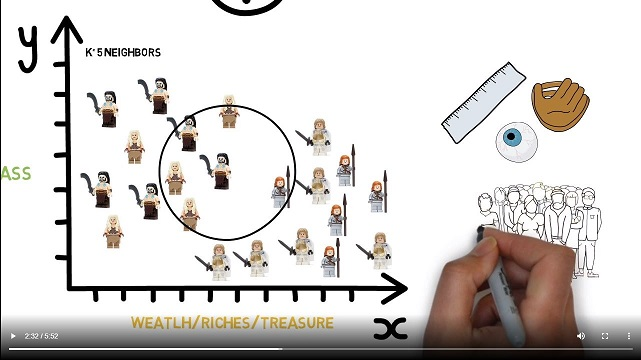

[Vidéo](https://isn-icn-ljm.pagesperso-orange.fr/fichiers/videomachinelearning.mp4)

#### 2. Une histoire de distance

L'idée directrice est que rien ne ressemble plus à un chat qu'un autre chat. Donc si je suis capable de mesurer la "distance" entre une donnée inconnue et des données connues, il y a de grandes chances que la **donnée inconnue soit de même nature que les données les plus proches d'elle**.

Pour simplifier, supposons que je dispose de **2 critères mesurables pour chacune de mes données d'entrée**, par exemple la longueur et la hauteur de l'animal. Alors je peux placer chaque animal sur un **graphique** avec la longueur en abcisse et la hauteur en ordonnée. Et si j'associe une **couleur différente** (mettons rouge, vert, bleu) à chaque point, **en fonction de sa nature** (chat, chien ou autruche), il y alors des chances que j'observe quelque choses qui ressemble à ceci :
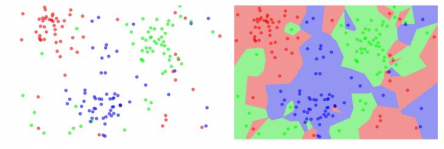
Ainsi, les **données de même nature sont proches les unes des autres en terme de distance dans le plan** (*distance euclidienne*).

#### 3. L'algorithme k-NN

Un **algorithme k-NN**, utilisé pour la **classification**, prend en **entrée un ensemble de données déjà étiquetées** dont il est **capable de calculer la distance entre chacunes** d'entre-elles. A partir de là, si on lui **fournit une donnée non-étiquetée et un nombre entier k**, il **renvoie une étiquette pour cette nouvelle donnée à partir de celles de ses k plus proches voisins**, c'est-à-dire des k données déjà étiquetées dont la distance par rapport à la donnée inconnue sont les plus petites.

*Etapes de l'algorithme :*

1. **Pour chaque donnée connue**:  
- **Calculer sa distance** par rapport à la donnée inconnue.
- **Ajouter cette distance** à la liste des distances.
2. **Trier la liste des distances** dans l'ordre croissant tout en conservant la correspondance avec les données concernées.
3. **Sélectionner les k premières** données trouvées (équivalent aux k plus proches voisins)
4. **Obtenir les étiquettes** de ces k données.
5. **Retourner la valeur la plus fréquente** des k étiquettes trouvées.

### III. 2ème exemple : Le problème du rendu de monnaie

#### 1. Poser le problème

Un commerçant doit **rendre la monnaie** à son client. Il dispose pour cela d'un certain **système de $n$ pièces** (la valeur des pièces qui existent) et pour simplifier, on peut supposer qu'il en possède une quantité infinie de chaque. Notons $p_0, p_1, ... p_n$ la **valeur des pièces existantes** en centimes, rangées par **ordre croissant**. La somme $r$ à rendre est aussi exprimée en centimes.

#### 2. Un problème d'optimisation

Le problème est de savoir **quelles pièces il doit rendre** pour être rendre **la somme nécessaire**, tout en **rendant un minimum de pièces**. On suppose $p_0 = 1$, sinon certaines sommes ne pourront pas être rendues.

Il s'agit bien d'un **problème d'optimisation** : on veut **minimiser le nombre de pièces rendues** avec la **contrainte que la somme de leurs valeurs soit bien égale à $r$**.

Ce problème est plus complexe que le précédent, car pour chaque pièce, on doit choisir combien en rendre parmi beaucoup plus de 2 possibilités. Pour la pièce de valeur $p_0 = 1$ centime, on peut en rendre entre $0$ et $r$ par exemple. Le résoudre en **force brute est donc encore moins envisageable**.

#### 3. La solution de l'algorithme glouton

Pour résoudre ce problème avec un **algorithme glouton**, il faut **passer en revue les pièces en partant de celles de plus grandes valeurs**. **Dès qu'on peut en rendre une** (dès que $p_k \leq r$) on le fait et on **met à jour la somme restant à rendre** (elle devient $r-p_k$). Puis on **recommence en repartant de la même pièce** et ainsi de suite **jusqu'à ce que la somme restant à rendre soit égale à zéro**.

Avec le **système de pièces de la zone euro**, comme avec la plupart des systèmes de pièces actuels, cet **algorithme glouton est optimal**. **Mais il ne l'est pas avec n'importe quel système de pièces.** En fait, il l'est devenu après la révolution française, grâce à la généralisation du système décimal qui a permis de rationnaliser les systèmes de monnaie.

Mais jusqu'en 1971, le système de monnaie utilisé au Royaume-Uni (1, 3, 4, 6, 12 pences puis 1 shilling, ...), par exemple, ne donnait pas une solution optimale avec cet algorithme (l'optimum pour rendre 8 pences est de rendre 2 pièces de 4 pences alors que l'algorithme glouton aboutit à 1 pièce de 6 pences et 2 pièces de 1 penny).

### IV. 3ème exemple : Le problème du sac à dos

#### 1. Poser le problème

Un voleur dispose devant lui d'un certain **nombre $n$ d'objets**, chacun caractérisé par **sa valeur $v_i$** et **son poids $p_i$**. Il doit **choisir son butin** de façon à emporter **la plus grande valeur $V$ possible** sachant que son sac à dos ne pourra pas supporter davantage qu'un certain **poids maximum $P$**.

**Remarque :** Il existe une **variante dite fractionnaire du problème** dans laquelle on peut emporter une fraction de son choix de chaque objet.

#### 2. Un problème d'optimisation

Le problème est de savoir **quels objets choisir**, sans dépasser le **poids limite**, tout en **emportant un butin de valeur maximale**. On suppose qu'il existe au moins un objet tel que $p_i \leq P$, sinon le voleur ne peut rien emporter.

Il s'agit bien d'un **problème d'optimisation** : on veut **maximiser la valeur $V$ du butin** avec la **contrainte de ne pas dépasser le poids maximum $P$**.

Ce problème a l'air plutôt simple puisque pour chaque objet, il n'y a que 2 choix : le voler ou le laisser. Cependant, on voit bien qu'il parait **difficile de faire le bon choix sans regarder le problème de façon globale**. Et effectivement, nous allons voir qu'un **algorithme glouton ne donnera pas ici, en général, le choix optimum**.

#### 3. La solution de l'algorithme glouton

Pour résoudre ce problème avec un **algorithme glouton**,  il existe au moins **3 façons différentes de choisir** les objets à emporter.

Soit on commence par prendre les objets **les plus chers**, soit **les plus légers**, soit **les plus rentables**, c'est-à-dire ceux dont le **rapport valeur/poids est le plus grand**.

Dans les 3 cas, on commence par **ignorer tous les objets dont le poids $p_i$ est supérieur à $P$**. Il suffit ensuite de **trier les objets par ordre décroissant selon le critère choisi** (valeur, poids ou rentabilité) et de **remplir** son sac **en commencant par le premier** et **tant que le poids $P$ n'est pas dépassé**.

Le meilleur **choix parmi ces 3 stratégies dépend de la répartition de valeur et de poids des objets** mais en général, ces algorithmes gloutons ne **permettent pas d'obtenir le remplissage optimum** du sac à dos. A part avec la variante fractionnaire où le critère de la rentablilité permet de trouver l'optimum.

Pour terminer, passons à la pratique avec le [TP](TP_04_1.ipynb) suivant ...